In [1]:
import torchvision.transforms as T

/home/user/anaconda3/envs/ece176/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from utils import *
from data_loader import *
from encoder_decoder import *

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data_location =  "dataa"

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [6]:
path_to_dataset = data_location

# Path to the directory containing image files
img_dir = f"{path_to_dataset}/Flickr8k_Dataset/Flicker8k_Dataset/"

# Path to the file containing captions
captions_file = f"{path_to_dataset}/Flickr8k_text/Flickr8k.token.txt"

# Path to the split files
train_file = f"{path_to_dataset}/Flickr8k_text/Flickr_8k.trainImages.txt"
val_file = f"{path_to_dataset}/Flickr8k_text/Flickr_8k.devImages.txt"
test_file = f"{path_to_dataset}/Flickr8k_text/Flickr_8k.testImages.txt"

transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# Initialize datasets for training, validation, and testing
train_dataset = Flickr8kDataset(img_dir, captions_file, train_file, transform=transform)
val_dataset = Flickr8kDataset(img_dir, captions_file, val_file, transform=transform)
test_dataset = Flickr8kDataset(img_dir, captions_file, test_file, transform=transform)

# Create DataLoader instances
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    collate_fn=Flickr8kDataset.collate_fn,
    num_workers=4,
)
val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=32,
    shuffle=False,
    collate_fn=Flickr8kDataset.collate_fn,
    num_workers=4,
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False,
    collate_fn=Flickr8kDataset.collate_fn,
    num_workers=4,
)

In [7]:
vocab_size = len(train_dataset.stoi)

In [8]:
#Hyperparams
embed_size=300
attention_dim=256
encoder_dim=2048
decoder_dim=512
learning_rate = 1e-4

In [ ]:
#init model
model = EncoderDecoder(
    embed_size=embed_size,
    vocab_size = vocab_size,
    attention_dim=attention_dim,
    encoder_dim=encoder_dim,
    decoder_dim=decoder_dim
).to(device)

model.load_state_dict(torch.load('model_1.pth'))
model.eval()

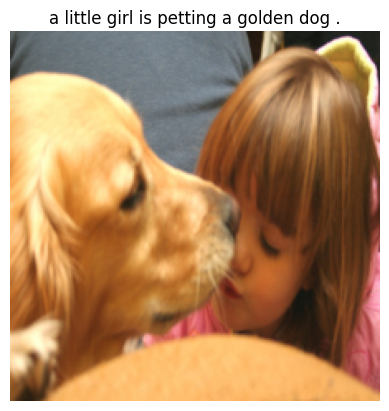

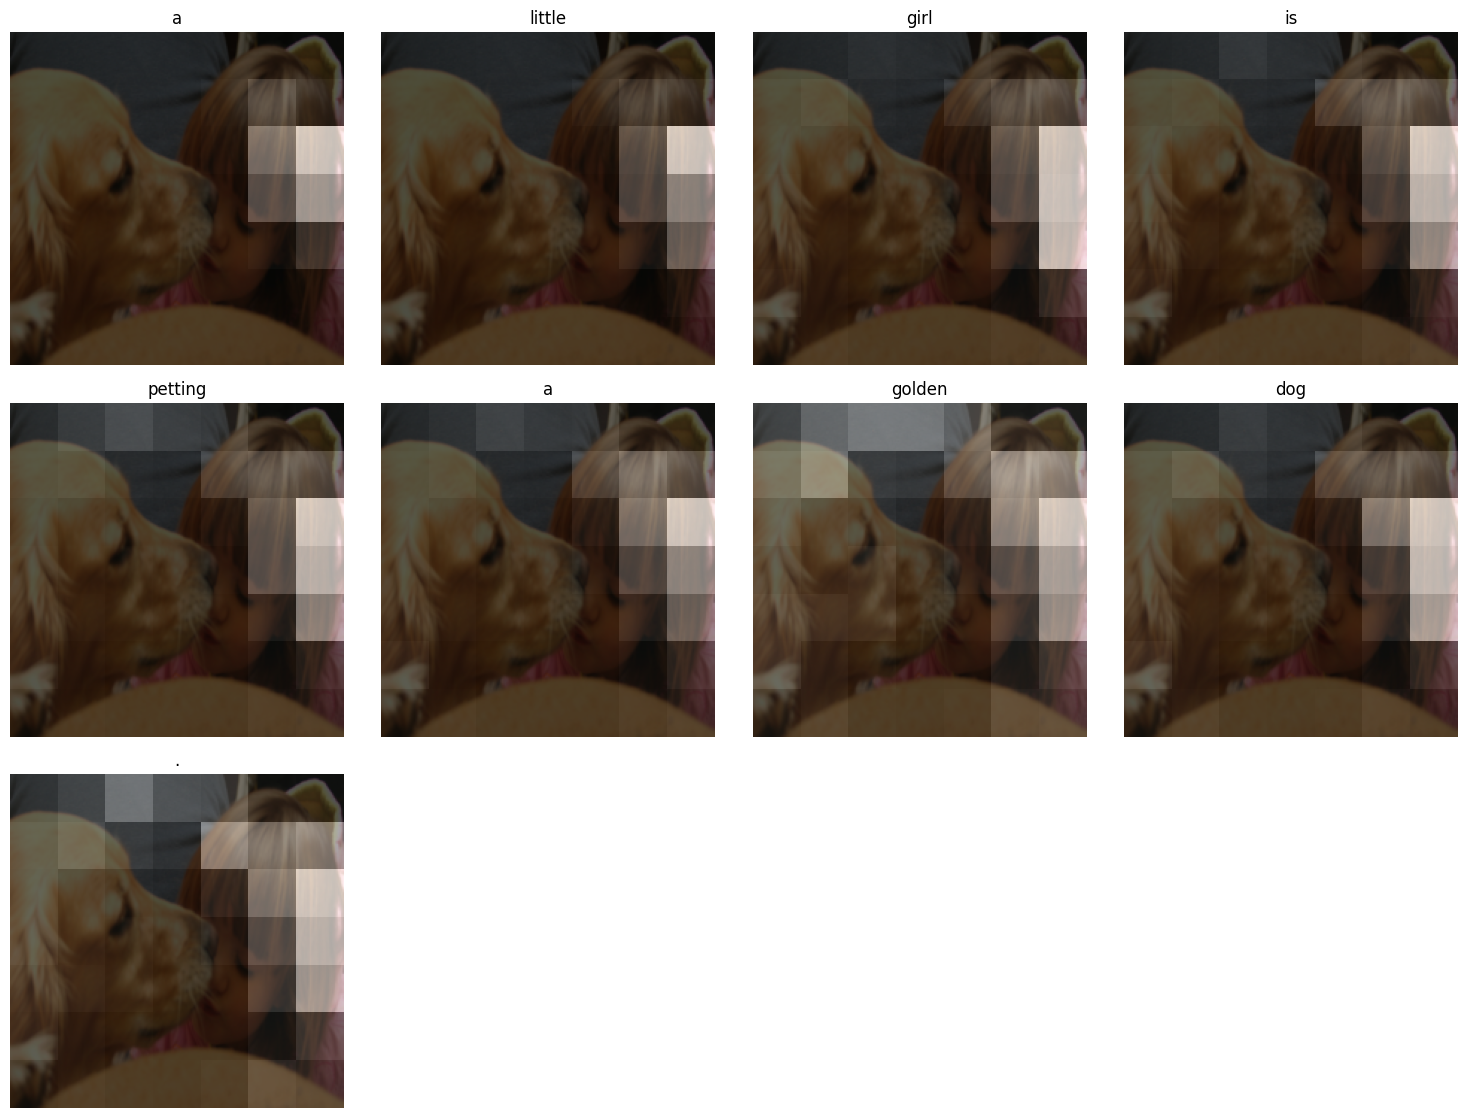

In [48]:
#show any 1
dataiter = iter(test_loader)
images,_ = next(dataiter)

img = images[0].detach().clone()
img1 = images[0].detach().clone()
caps,alphas = get_caps_from(img.unsqueeze(0))
words = [word for word in caps if word != '<EOS>']
plot_attention(img1, words, alphas)

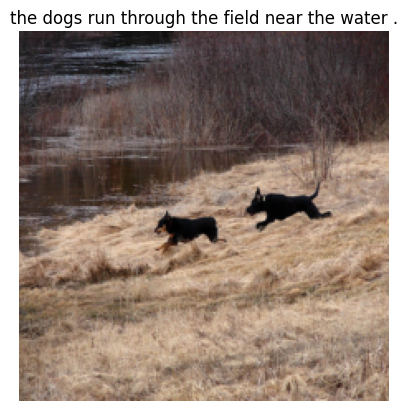

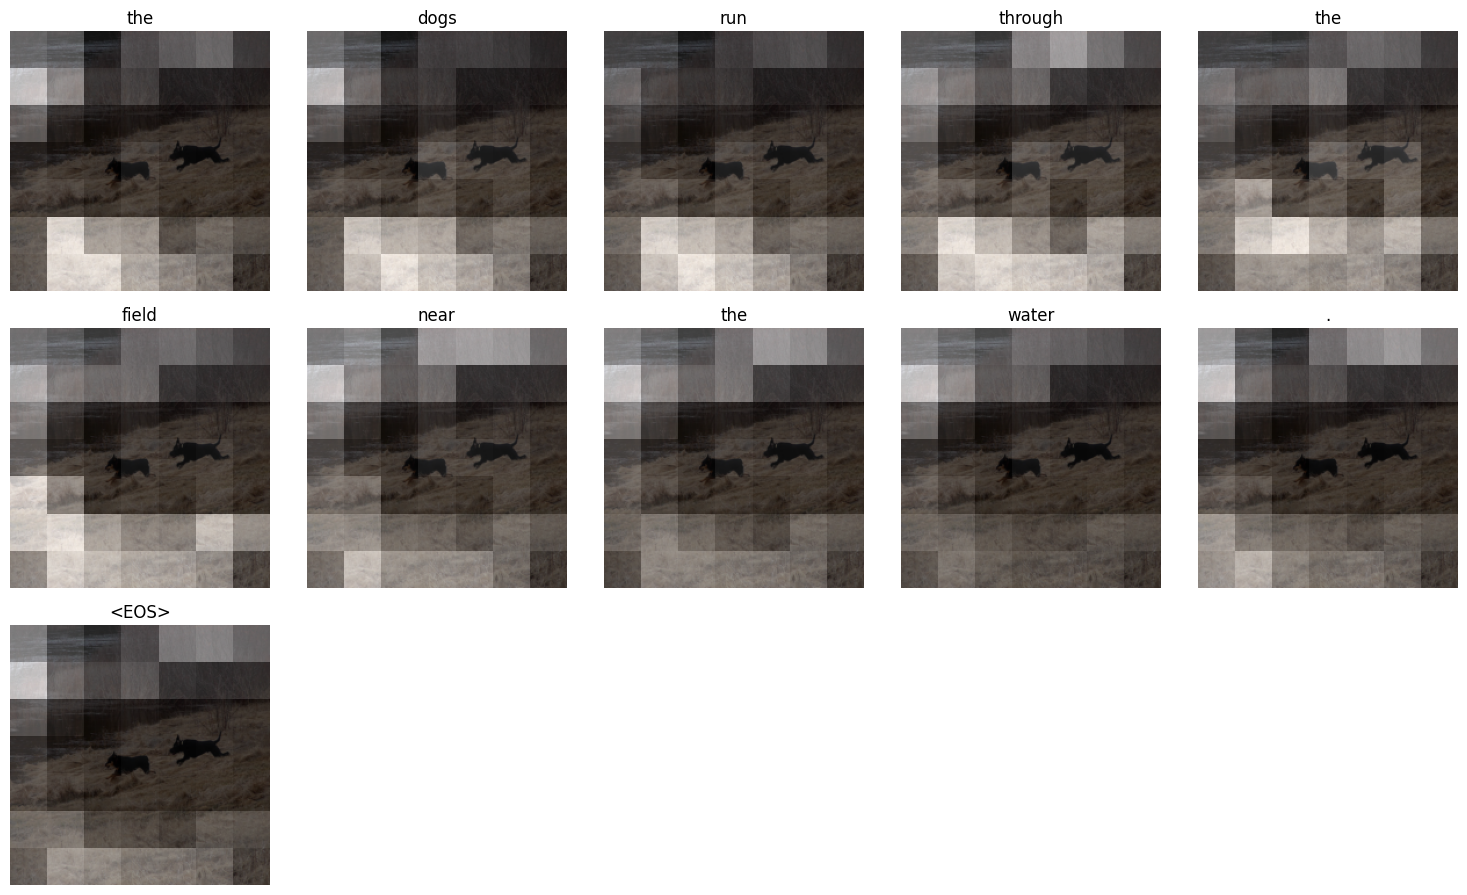

In [57]:
#show any 1
dataiter = iter(test_loader)
images,_ = next(dataiter)

img = images[0].detach().clone()
img1 = images[0].detach().clone()
caps,alphas = get_caps_from(img.unsqueeze(0))

plot_attention(img1, caps, alphas)

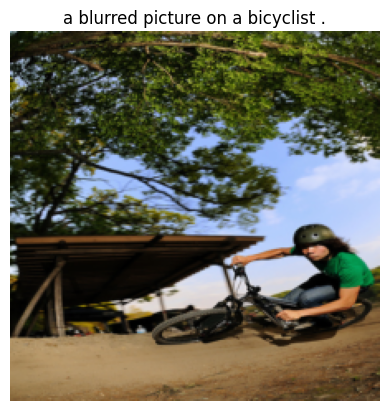

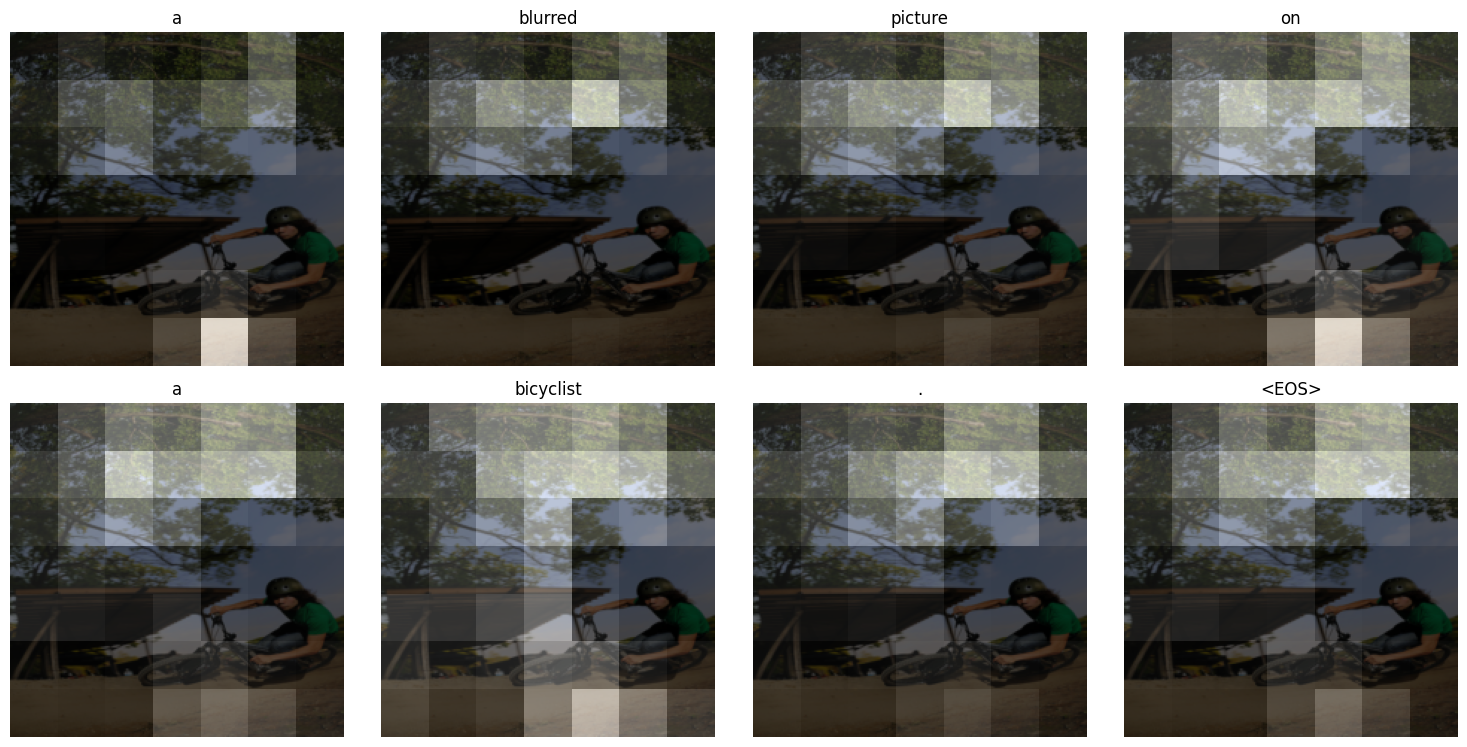

In [68]:
#show any 1
dataiter = iter(test_loader)
images,_ = next(dataiter)

img = images[0].detach().clone()
img1 = images[0].detach().clone()
caps,alphas = get_caps_from(img.unsqueeze(0))

plot_attention(img1, caps, alphas)